<a href="https://colab.research.google.com/github/siva123h/LLM/blob/main/Recognition_of_Handwritten_Single_Digit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8638 - loss: 0.4973
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9552 - loss: 0.1508
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9689 - loss: 0.1065
Please upload a handwritten digit image:


Saving Screenshot 2026-02-08 224050.png to Screenshot 2026-02-08 224050.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


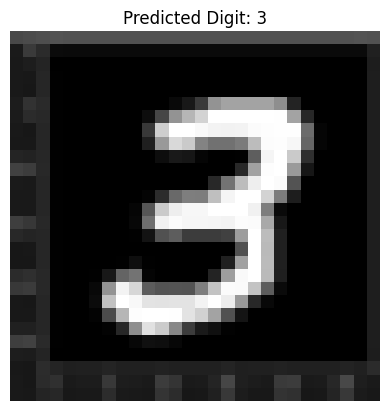

Predicted digit is: 3


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from google.colab import files

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Build Feed Forward Neural Network
nn_model = Sequential()
nn_model.add(Flatten(input_shape=(28, 28)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

# Compile the model
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
nn_model.fit(train_images, train_labels, epochs=3)

# Upload handwritten digit image
print("Please upload a handwritten digit image:")
uploaded_files = files.upload()
file_name = next(iter(uploaded_files))

# Image preprocessing
image = Image.open(file_name).convert("L")
image = image.resize((28, 28))
image_data = np.array(image)
image_data = 255 - image_data
image_data = image_data / 255.0
image_data = image_data.reshape(1, 28, 28)

# Predict digit
result = nn_model.predict(image_data)
predicted_digit = np.argmax(result)

# Display image and prediction
plt.imshow(image_data.reshape(28, 28), cmap="gray")
plt.title("Predicted Digit: " + str(predicted_digit))
plt.axis("off")
plt.show()
print("Predicted digit is:", predicted_digit)